In [2]:
%matplotlib inline
from scipy.special import factorial

In [49]:
def poisson(k, lamb):
    return (lamb**k/factorial(k))*np.exp(-lamb)
def expected_sky_count(mu_n, k):
    k = int(k)
    mu_s_list = np.zeros(k+1)
    weights_list = np.zeros(k+1)
    #mu_s_bar_0 = (-1. * mu_n + np.sqrt(mu_n**2 + 4.) )/2.
    mu_s_bar_0 = k
    # zero-count prob
    #prob_0 = (1. - mu_n/np.sqrt(mu_n**2 + 4.) )**k
    prob_0 = mu_s_bar_0**k / (mu_n + mu_s_bar_0)**k
    mu_s_list[0] = mu_s_bar_0
    weights_list[0] = prob_0
    for k_n in np.arange(1,k+1):
        k_n = float(k_n)
        mu_s_bar = ((k -k_n) * mu_n)/ k_n 
        #prob = (float(factorial(k)) / (factorial(k_n) * factorial(k - k_n))) * ((k-k_n)**(k-k_n)*(k_n)**(k_n)/(k**k))
        prob = poisson(mu_s_bar,k-k_n) * poisson(mu_n, k_n)
        #prob = (k_n**k_n * (k - k_n)**(k - k_n))/(k**k)
        mu_s_list[int(k_n)] = mu_s_bar
        weights_list[int(k_n)] = prob
    mu_s_star = np.average(mu_s_list,weights=weights_list)
    err_mu = np.sqrt(np.cov(mu_s_list,aweights = weights_list))
    return mu_s_star, err_mu


In [50]:
mu_n_list = np.linspace(0.1, 4., 100)

In [51]:
k = 10
mu_starlist = np.zeros_like(mu_n_list)
errlist = np.zeros_like(mu_n_list)
for i, mu_n in enumerate(mu_n_list):
    mu_starlist[i], errlist[i] = expected_sky_count(mu_n, k)
    

Text(0, 0.5, 'mu_star')

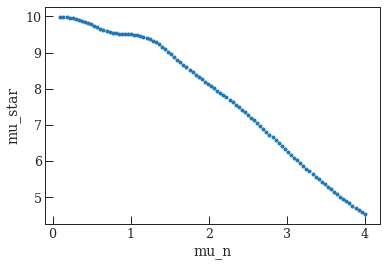

In [52]:
plt.plot(mu_n_list, mu_starlist,'.')
plt.xlabel('mu_n')
plt.ylabel('mu_star')

Text(0.5, 0, 'mu_n')

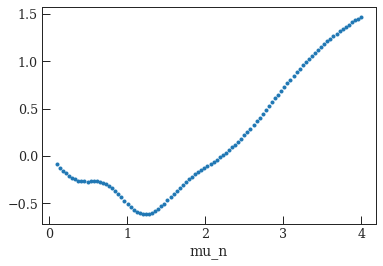

In [53]:
plt.plot(mu_n_list, k - mu_starlist - mu_n_list, '.')
plt.xlabel('mu_n')

Text(0, 0.5, 'err_mu_star')

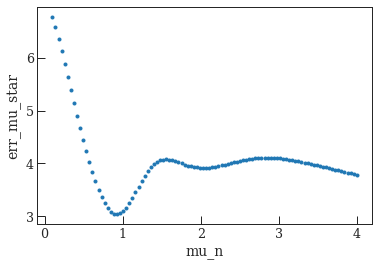

In [54]:
plt.plot(mu_n_list, errlist,'.')
plt.xlabel('mu_n')
plt.ylabel('err_mu_star')